# Datatree
An example of working with a datatree

## Imports 

In [1]:
import sys, os
from pathlib import Path
import numpy as np
#Import xarray datatree
import datatree
import xarray as xr
#Plot the average temperature for the historical and ssp245 scenario
import matplotlib.pyplot as plt

git_dir = Path(os.popen('git rev-parse --show-toplevel').read().strip())
test_data_folder = git_dir.joinpath('tests').joinpath('data')

## A datatree

A datatree is a collection of xarray DataSets that are organized in a tree structure. See [DataTree docs](https://xarray-datatree.readthedocs.io/en/latest/) for more information.
It allows us to store xarrays in a folder like structure, and to easily navigate and manipulate them. They do not have the same xarray dimensions as an Xarray Dataset requires.

In [3]:

#Make a random observation dataset
np.random.seed(0)
obs = xr.Dataset(
    {
        "temperature": (("time", "lat", "lon"), np.random.rand(10, 10, 10)),
        "precipitation": (("time", "lat", "lon"), np.random.rand(10, 10, 10)),
    },
    coords={
        "time": np.arange(10),
        "lat": np.linspace(-90, 90, 10),
        "lon": np.linspace(-180, 180, 10),
    },
)

ds=xr.open_mfdataset(str(test_data_folder) + "/*historical*.nc", combine='by_coords', chunks='auto')
ds2=xr.open_mfdataset(str(test_data_folder) + "/*ssp245*.nc", combine='by_coords', chunks='auto')

dt = datatree.DataTree.from_dict({"model/historical": ds, "model/ssp245": ds2, "obs": obs})
dt

DataTree('None', parent=None)
├── DataTree('model')
│   ├── DataTree('historical')
│   │       Dimensions:    (time: 24, bnds: 2, lat: 256, lon: 512)
│   │       Coordinates:
│   │         * time       (time) datetime64[ns] 192B 1953-01-16T12:00:00 ... 1954-12-16T...
│   │         * lat        (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
│   │         * lon        (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
│   │           height     float64 8B 2.0
│   │       Dimensions without coordinates: bnds
│   │       Data variables:
│   │           time_bnds  (time, bnds) datetime64[ns] 384B dask.array<chunksize=(12, 2), meta=np.ndarray>
│   │           lat_bnds   (time, lat, bnds) float64 98kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
│   │           lon_bnds   (time, lon, bnds) float64 197kB dask.array<chunksize=(12, 512, 2), meta=np.ndarray>
│   │           tas        (time, lat, lon) float32 13MB dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
│   │       Attributes: (12/46)
│   │           Conventions:                        CF-1.7 CMIP-6.2
│   │           activity_id:                        CMIP
│   │           branch_method:                      standard
│   │           branch_time_in_child:               0.0
│   │           branch_time_in_parent:              29219.0
│   │           contact:                            cmip6-data@ec-earth.org
│   │           ...                                 ...
│   │           variant_label:                      r1i1p1f1
│   │           license:                            CMIP6 model data produced by EC-Earth...
│   │           cmor_version:                       3.4.0
│   │           tracking_id:                        hdl:21.14100/18af2970-6a17-45fe-b629-...
│   │           history:                            2019-06-06T07:27:13Z ; CMOR rewrote d...
│   │           latest_applied_cmor_fixer_version:  v3.0
│   └── DataTree('ssp245')
│           Dimensions:    (time: 24, bnds: 2, lat: 256, lon: 512)
│           Coordinates:
│             * time       (time) datetime64[ns] 192B 2015-01-16T12:00:00 ... 2016-12-16T...
│             * lat        (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
│             * lon        (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
│               height     float64 8B 2.0
│           Dimensions without coordinates: bnds
│           Data variables:
│               time_bnds  (time, bnds) datetime64[ns] 384B dask.array<chunksize=(12, 2), meta=np.ndarray>
│               lat_bnds   (time, lat, bnds) float64 98kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
│               lon_bnds   (time, lon, bnds) float64 197kB dask.array<chunksize=(12, 512, 2), meta=np.ndarray>
│               tas        (time, lat, lon) float32 13MB dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
│           Attributes: (12/45)
│               Conventions:            CF-1.7 CMIP-6.2
│               activity_id:            ScenarioMIP
│               branch_method:          standard
│               branch_time_in_child:   60265.0
│               branch_time_in_parent:  60265.0
│               contact:                cmip6-data@ec-earth.org
│               ...                     ...
│               variable_id:            tas
│               variant_label:          r1i1p1f1
│               license:                CMIP6 model data produced by EC-Earth-Consortium ...
│               cmor_version:           3.4.0
│               tracking_id:            hdl:21.14100/697b3a82-4ffc-49ce-b070-2ca86ce8a06f
│               history:                2019-06-29T08:25:09Z ; CMOR rewrote data to be co...
└── DataTree('obs')
        Dimensions:        (time: 10, lat: 10, lon: 10)
        Coordinates:
          * time           (time) int64 80B 0 1 2 3 4 5 6 7 8 9
          * lat            (lat) float64 80B -90.0 -70.0 -50.0 -30.0 ... 50.0 70.0 90.0
          * lon            (lon) float64 80B -180.0 -140.0 -100.0 ... 

You can apply the same operations to a datatree as you would to a single xarray dataset, but it will be applied to all the datasets in the tree.

In [4]:

avg=dt.mean("time")
avg #Is the same datatree as dt, but with the time dimension removed


DataTree('None', parent=None)
├── DataTree('model')
│   ├── DataTree('historical')
│   │       Dimensions:   (lat: 256, bnds: 2, lon: 512)
│   │       Coordinates:
│   │         * lat       (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
│   │         * lon       (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
│   │           height    float64 8B 2.0
│   │       Dimensions without coordinates: bnds
│   │       Data variables:
│   │           lat_bnds  (lat, bnds) float64 4kB dask.array<chunksize=(256, 2), meta=np.ndarray>
│   │           lon_bnds  (lon, bnds) float64 8kB dask.array<chunksize=(512, 2), meta=np.ndarray>
│   │           tas       (lat, lon) float32 524kB dask.array<chunksize=(256, 512), meta=np.ndarray>
│   └── DataTree('ssp245')
│           Dimensions:   (lat: 256, bnds: 2, lon: 512)
│           Coordinates:
│             * lat       (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
│             * lon       (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
│               height    float64 8B 2.0
│           Dimensions without coordinates: bnds
│           Data variables:
│               lat_bnds  (lat, bnds) float64 4kB dask.array<chunksize=(256, 2), meta=np.ndarray>
│               lon_bnds  (lon, bnds) float64 8kB dask.array<chunksize=(512, 2), meta=np.ndarray>
│               tas       (lat, lon) float32 524kB dask.array<chunksize=(256, 512), meta=np.ndarray>
└── DataTree('obs')
        Dimensions:        (lat: 10, lon: 10)
        Coordinates:
          * lat            (lat) float64 80B -90.0 -70.0 -50.0 -30.0 ... 50.0 70.0 90.0
          * lon            (lon) float64 80B -180.0 -140.0 -100.0 ... 100.0 140.0 180.0
        Data variables:
            temperature    (lat, lon) float64 800B 0.4555 0.5297 ... 0.3901 0.5491
            precipitation  (lat, lon) float64 800B 0.6017 0.56 0.5124 ... 0.5403 0.4418

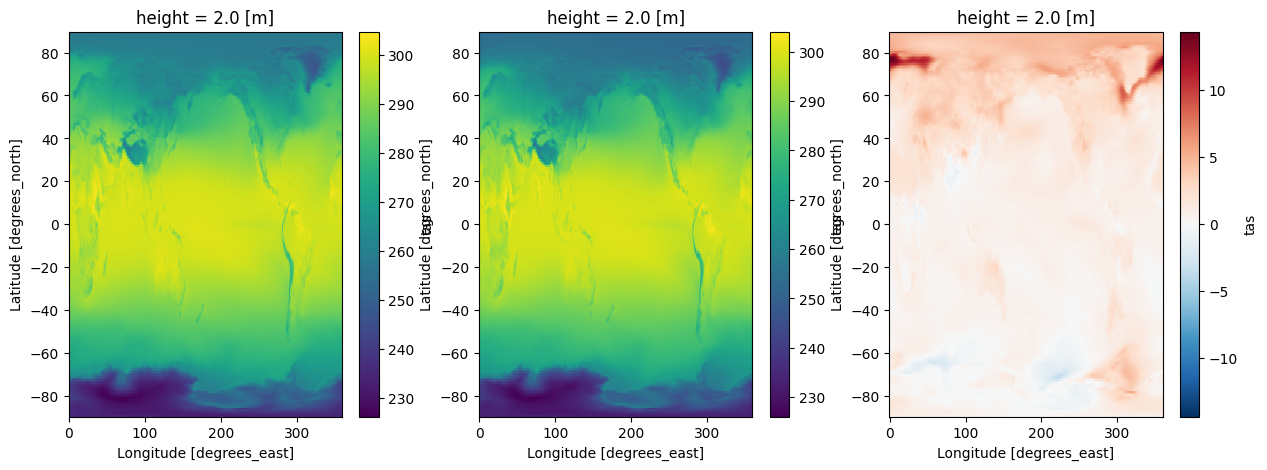

In [5]:
#Quick plot using an Xarray datatree
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
avg.model.ssp245.tas.plot(ax=ax[0], label="ssp245")
avg.model.historical.tas.plot(ax=ax[1], label="historical")
#Plot the difference between the two scenarios
(avg.model.ssp245.tas-avg.model.historical.tas).plot(ax=ax[2], label="ssp245 - historical")
plt.show()